Making a CNN for a project, the finished product will be here: [INSERT URL HERE]

In [40]:
# Imports

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import time

In [41]:
# Checking GPU access
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "dont")
print(device)

True
cuda


In [42]:
# Transformation pipeline to turn images into tensors, and normalizing said images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
])

In [ ]:
# Loading the data

train_data = datasets.FashionMNIST(root='./DataFMNIST', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./DataFMNIST', train=False, download=True, transform=transform)

BATCH_SIZE = 64

trainloader = DataLoader(train_data, batch_size= BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_data, batch_size= BATCH_SIZE, shuffle=True)

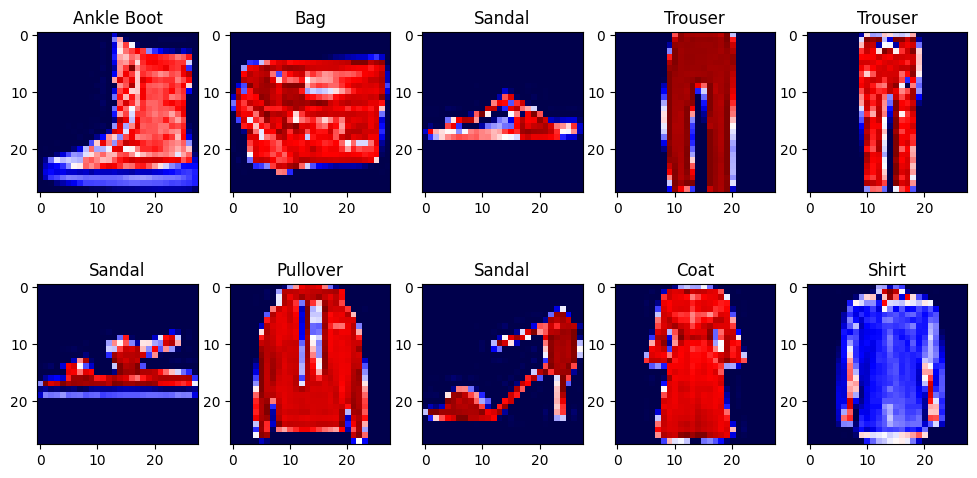

In [44]:
# Pre-Viz of the images
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

images, labels = next(iter(trainloader))

preview = plt.figure(figsize=(12,6))
for i in range(10):
    ax = preview.add_subplot(2, 5, i+1)
    ax.imshow(np.squeeze(images[i].numpy()), cmap='seismic')
    ax.set_title(class_names[labels[i].item()])
plt.show()

In [55]:
# Defining the model architecture

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size= 3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [65]:
# Training model

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Lists for visualization later
train_loss = []

# Training loop

EPOCHS = 7
for epoch in range(EPOCHS):
    start_time = time.time()
    model.train()
    running_loss = 0
    for i, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    training_loss = running_loss/len(trainloader)
    train_loss.append(training_loss)
    
    print(f'Epoch: {epoch + 1}. Loss {training_loss:.2f}. Time Taken: {(time.time() - start_time):.2f}')

Epoch: 1. Loss 0.15. Time Taken: 13.04
Epoch: 2. Loss 0.15. Time Taken: 13.05
Epoch: 3. Loss 0.15. Time Taken: 13.03
Epoch: 4. Loss 0.14. Time Taken: 12.95
Epoch: 5. Loss 0.14. Time Taken: 13.53
Epoch: 6. Loss 0.14. Time Taken: 13.01
Epoch: 7. Loss 0.14. Time Taken: 13.10


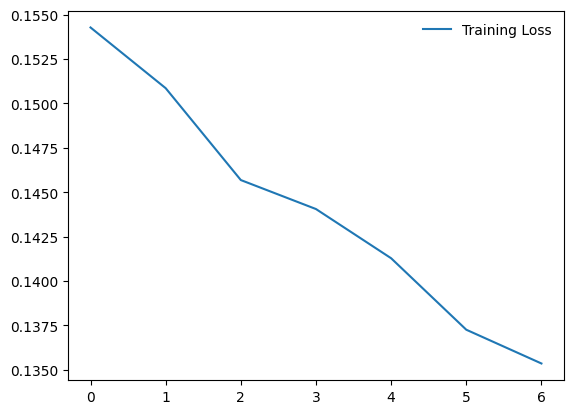

In [66]:
# Training loss over time

plt.plot(train_loss, label="Training Loss")
plt.legend(frameon = False)

In [ ]:
# Model evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * (correct / total)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 91.7400


In [ ]:
# Ejemplo del pre-procesamiento

